Бобровская Наталия, 491 группа, Задание 1

$\textbf{3 Метрики в задаче регрессии}$


40% баллов за задание, оценочное время выполнения: 120 минут

Начало 19:00


Сгенерируйте датасет из 500 точек на плоскости, для которых $y = 0.5x + 1 + \epsilon$, где $\epsilon$ распределено нормально с матожиданием 0 и дисперсией 0.2.

1. Визуализируйте выборку.

2. Восстановите по выборке зависимость $y(x)$, считая, что зависимость имеет вид y = kx+b,и минимизируя MSE на обучающей выборке, воспользовавшись scipy.optimize.minimize. Визуализируйте восстановленную прямую.

3. Добавьте теперь в выборку 75 точек, для которых $y = 1 + \epsilon$, а x принимает различные значения из того же диапазона, что и у уже имевшихся точек в обучающей выборке. По новой расширенной выборке снова попробуйте восстановить зависимость $y(x) = kx + b$ двумя способами: минимизируя MSE и минимизируя MAE. Визуализируйте полученные
прямые.

4. На основе полученных графиков сделайте вывод об устойчивости моделей, оптимизирующих MSE и MAE к выбросам.

In [53]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.optimize import minimize

In [54]:
#Сгенерируйте датасет из 500 точек на плоскости, 
#для которых y = 0.5x + 1 +  eps , где  eps  распределено нормально с матожиданием 0 и дисперсией 0.2.

N = 100
a = 0
b = 100
arr_x = np.random.uniform(a,b,N)
print arr_x[:10]

[ 72.14299236  64.79175034  51.00511715  13.28163461  97.36904864
  92.41599242  70.00430439   8.93974475  89.84838571  69.78255818]


In [55]:
arr_y = 0.5 * arr_x + 1 + np.random.normal(0, 0.2, N)
print arr_y[:10]

[ 37.06960433  33.13185568  26.67617114   7.75232384  49.68760173
  47.3302846   35.90056134   5.45634375  45.66462513  35.90328126]


In [56]:
# Восстановите по выборке зависимость y(x), считая, что зависимость имеет вид y = kx+b,
#и минимизируя MSE на обучающей выборке, воспользовавшись scipy.optimize.minimize.

def func_mse(params):
    return np.mean((params[0] * arr_x + params[1] - arr_y)**2)

k_init = 2.
b_init = 2.
params = minimize(func_mse, [k_init,b_init], method='nelder-mead').x
print params

[ 0.50098238  0.9435701 ]


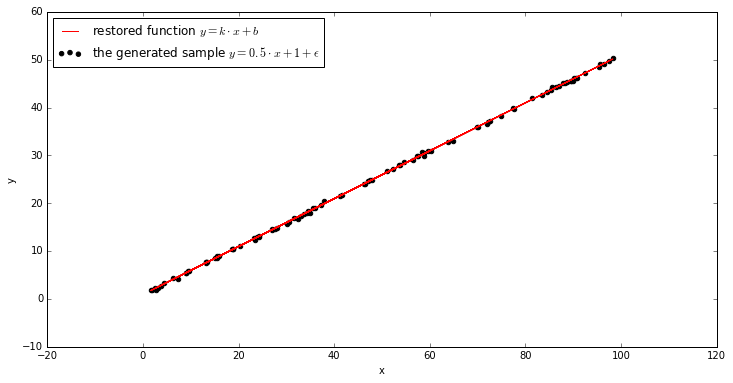

In [58]:
#Визуализируйте выборку, Визуализируйте восстановленную прямую.

plt.figure(figsize=(12,6))
plt.scatter(arr_x, arr_y, color = 'black', label = 'the generated sample $y = 0.5 \cdot x + 1 + \epsilon$')
plt.plot(arr_x,  params[0] * arr_x + params[1], color = 'red', label = 'restored function $y = k \cdot x + b$')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc = 'best')

In [59]:
#Добавьте теперь в выборку 75 точек, для которых y = 1 +  eps ,
#а x принимает различные значения из того же диапазона, что и у уже имевшихся точек в обучающей выборке. 

N2 = 75

arr_x = np.concatenate((arr_x,  np.random.uniform(a,b,N2)))
print arr_x[:10]
arr_y = np.concatenate((arr_y,  -1 +  np.random.normal(0, 0.2, N2)))
print arr_y[:10]

[ 72.14299236  64.79175034  51.00511715  13.28163461  97.36904864
  92.41599242  70.00430439   8.93974475  89.84838571  69.78255818]
[ 37.06960433  33.13185568  26.67617114   7.75232384  49.68760173
  47.3302846   35.90056134   5.45634375  45.66462513  35.90328126]


In [60]:
print len(arr_x)
print len(arr_y)

175
175


[ 0.27517126  0.23299685]
[ 0.50013966  0.74369483]


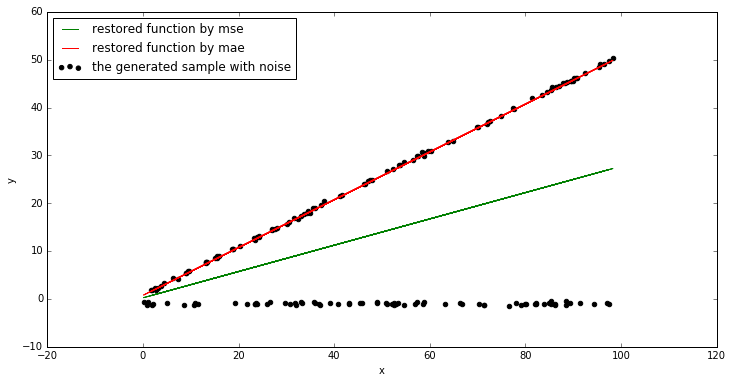

In [61]:
#По новой расширенной выборке снова попробуйте восстановить зависимость y(x) = kx + b двумя способами: 
#минимизируя MSE и минимизируя MAE. Визуализируйте полученные прямые.

def func_mae(params):
    return np.mean(abs(params[0] * arr_x + params[1] - arr_y))

params_mse = minimize(func_mse, [k_init,b_init], method='nelder-mead').x
params_mae = minimize(func_mae, [k_init,b_init], method='nelder-mead').x
print params_mse
print params_mae

plt.figure(figsize=(12,6))
plt.scatter(arr_x, arr_y, color = 'black', label = 'the generated sample with noise')
plt.plot(arr_x,  params_mse[0] * arr_x + params_mse[1], color = 'green', label = 'restored function by mse')
plt.plot(arr_x,  params_mae[0] * arr_x + params_mae[1], color = 'red', label = 'restored function by mae')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc = 'best')

MAE более устойчива к выбросам, нежели MSE.